# Titanic Case

## Given Data

##### `Train.csv` contains the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

##### The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. The task is to predict these outcomes.

##### Using the patterns in the train.csv data, we will predict whether the other 418 passengers on board (found in test.csv) survived.

##### Factors are 1) <mark>Pclass</mark> (Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd), 2) <mark>Name</mark>, 3)<mark>Sex</mark>, 4) <mark>Age</mark> (in years), 5) <mark>SibSp</mark> (siblings / spouses aboard the Titanic), 6) <mark>Parch</mark> (parents / children aboard the Titanic), 7) <mark>Ticket</mark> (Ticket number), 8) <mark>Fare</mark>, 9) <mark>Cabin</mark> (Cabin number), 10) <mark>Embarked</mark> (Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton), and 11) <mark>Survived</mark> (only in `Train.csv`).

## Imports
First of all, we have to import the packages:
* **Pandas** for manipulating with data,
* **Seaborn** for statistical plotting.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('D:\\Titanic Project\\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('D:\\Titanic Project\\test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning data

We can see that there are many NaN\`s in some of the columns: 

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have to drop ***Cabin*** column due to the very low number of real data in it. ***Age*** and ***Embarked*** is considered to be saved with filling of all NaN\`s with the median value for Age column and the most common value (so called a *mode*) for Embarked. We also have to drop useless for prediction colums such as ***Name*** and ***Ticket***:

In [5]:
useless_columns = ['Name', 'Ticket', 'Cabin']
clean_train = df_train.drop(useless_columns, axis = 1)
clean_test = df_test.drop(useless_columns, axis = 1)

In [6]:
clean_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


***
Some methods from Pandas that we will use:
* `DataFrame.select_dtypes(include=None, exclude=None)` — return a subset of the DataFrame’s columns based on the column dtypes;
* `DataFrame.columns` — the column labels of the DataFrame;
* `DataFrame.values` — return a Numpy representation of the DataFrame;
* `DataFrame.isnull()` — return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values;
* `DataFrame.any(axis=0, bool_only=None, skipna=True, level=None, **kwargs)` — return whether any element is True, potentially over an axis. Returns False unless there is at least one element within a series or along a Dataframe axis that is True or equivalent (e.g. non-zero or non-empty);
* `DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)` — fill NA/NaN values using the specified method;
* `DataFrame.mode(axis=0, numeric_only=False, dropna=True)` — Get the mode(s) of each element along the selected axis. The mode of a set of values is the value that appears most often. It can be multiple values.
***

In [7]:
def fill_na(df):
    df_copy = df.copy()
    
    categorial_vars = df_copy.select_dtypes(include=['object']).columns
    for col in categorial_vars:
        if df_copy[col].isnull().any():
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
    
    numerical_vars = df_copy.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_vars:
        if df_copy[col].isnull().any():
            df_copy[col] = df_copy[col].fillna(df_copy[col].median())
    
    return df_copy

In [8]:
clean_train_full = fill_na(clean_train)
clean_test_full = fill_na(clean_test)

In [9]:
clean_train_full

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [10]:
# turning categorial Sex and Embarked into dummy features
clear_train = pd.get_dummies(clean_train_full, drop_first = 1)
clear_test = pd.get_dummies(clean_test_full, drop_first = 1)

In [11]:
clear_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Initial Analysis

In [12]:
# text output with groupping in Pandas
clear_train.groupby(['Pclass', 'Sex_male'])['Survived'].value_counts(normalize = True)

Pclass  Sex_male  Survived
1       0         1           0.968085
                  0           0.031915
        1         0           0.631148
                  1           0.368852
2       0         1           0.921053
                  0           0.078947
        1         0           0.842593
                  1           0.157407
3       0         0           0.500000
                  1           0.500000
        1         0           0.864553
                  1           0.135447
Name: Survived, dtype: float64

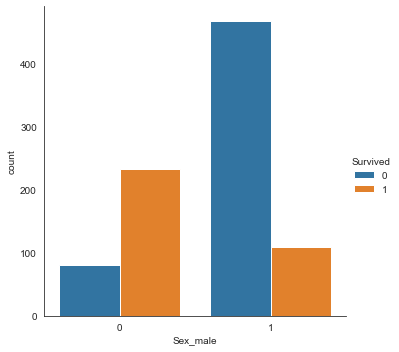

In [14]:
# draw catplot
sns.catplot(x = 'Sex_male', kind = 'count', data = clear_train, hue = 'Survived')
# changing the theme to white
sns.set_style('white')

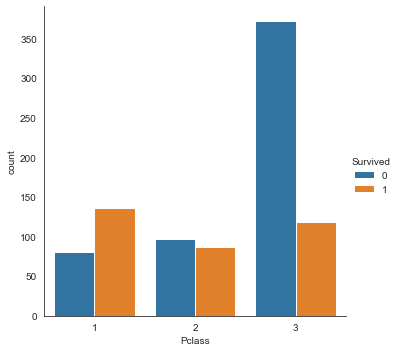

In [15]:
sns.catplot(x = 'Pclass', kind = 'count', data = clear_train, hue = 'Survived')
sns.set_style('white')

![Image of titanic.](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.nagarajbhat.com%2Fpost%2Fpredicting-titanic-survival%2Ffeatured.jpg&f=1&nofb=1)

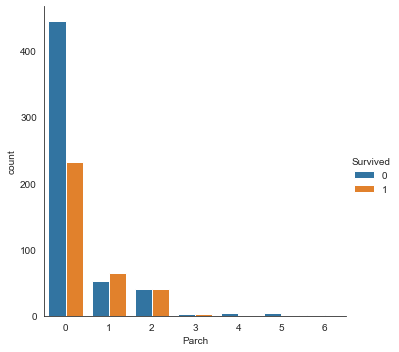

In [16]:
sns.catplot(x = 'Parch', kind = 'count', data = clear_train, hue = 'Survived')
sns.set_style('white')

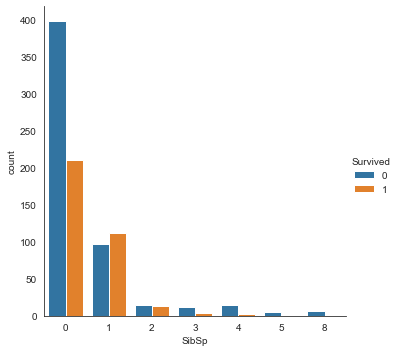

In [17]:
sns.catplot(x = 'SibSp', kind = 'count', data = clear_train, hue = 'Survived')
sns.set_style('white')

***
It looks like men are more likely to die so do poor people of third class. Also, the more siblings, spouses, children or parents a person has on board, the more chances for him/her to survive in general. 
***

We can see the same regularity in SibSp and Parch so it would be reasonable to join them into one feature.

In [18]:
clear_train['Relatives'] = clear_train['Parch'] + clear_train['SibSp']
clear_train = clear_train.drop(['Parch', 'SibSp'], axis = 1)

clear_test['Relatives'] = clear_test['Parch'] + clear_test['SibSp']
clear_test = clear_test.drop(['Parch', 'SibSp'], axis = 1)

In [19]:
clear_train

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Relatives
0,1,0,3,22.0,7.2500,1,0,1,1
1,2,1,1,38.0,71.2833,0,0,0,1
2,3,1,3,26.0,7.9250,0,0,1,0
3,4,1,1,35.0,53.1000,0,0,1,1
4,5,0,3,35.0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,0,1,0
887,888,1,1,19.0,30.0000,0,0,1,0
888,889,0,3,28.0,23.4500,0,0,1,3
889,890,1,1,26.0,30.0000,1,0,0,0


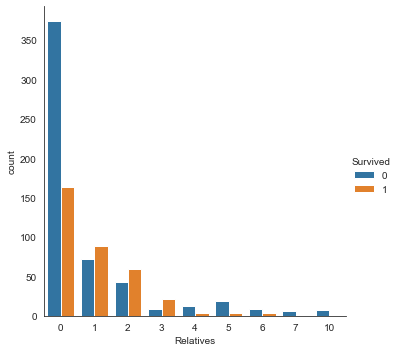

In [20]:
sns.catplot(x = 'Relatives', kind = 'count', data = clear_train, hue = 'Survived')
sns.set_style('white')

# Modeling

In [21]:
y_train = clear_train.Survived
X_train = clear_train.drop(['Survived'], axis = 1)
X_test = clear_test

## Decision Tree

A Decision Tree is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach to the leaf, the sample is propagated through nodes, starting at the root node. In each node a decision is made, to which descendant node it should go. A decision is made based on the selected sample’s feature. Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt_clf = DecisionTreeClassifier() # creating an instance of previously imported class

In [24]:
%%time
dt_clf.fit(X_train, y_train)  # learning

Wall time: 26.8 ms


DecisionTreeClassifier()

In [25]:
pred_dt = dt_clf.predict(X_test) # predicting a result

In [26]:
pred_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Visualization of Decision Tree

In [27]:
from sklearn.tree import export_text

In [28]:
text_representation = export_text(dt_clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_7 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  2.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_3 <= 28.86
|   |   |   |   |--- feature_3 <= 28.23
|   |   |   |   |   |--- feature_2 <= 56.00
|   |   |   |   |   |   |--- feature_0 <= 48.00
|   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  48.00
|   |   |   |   |   |   |   |--- feature_0 <= 373.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 352.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 27.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 25.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |

In [29]:
def make_prediction_file(prediction, test_data, name):
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], 'Survived': prediction})
    result.to_csv(name, index=False)

In [37]:
make_prediction_file(pred_dt, clear_test, 'titanic_dt_simple.csv')

![Image](titanic_dt_simple_submission.jpg)

### Better selection of hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
clf = DecisionTreeClassifier()
params = {'criterion': ['entropy', 'gini'],
          'max_depth': range(1, 10),
          'min_samples_split': range(2, 10),
          'min_samples_leaf': range(1, 10)
         }
grid_cv = GridSearchCV(clf, params, cv = 5)

In [32]:
%%time

grid_cv.fit(X_train, y_train)

Wall time: 42.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [33]:
# choosing the best model
best_model = grid_cv.best_estimator_

In [34]:
grid_cv.best_params_ # the best parameters

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [35]:
grid_pred = best_model.predict(X_test) # making prediction

In [51]:
make_prediction_file(grid_pred, clear_test, 'titanic_dt_improved.csv')

![Image of score on Kaggle](titanic_dt_improved.jpg)

## Remastered edition

During the work I have noticed many possible improvements in code. First is taking the median and mode values for missing values across the whole data (joined training and test sets) in order not to miss important imformation. Second is to compute the median of age depends on the sex of the passenger. Finally, the style of coding has changed to satisfy an OOP.

In [151]:
df_train = pd.read_csv('D:\\Titanic Project\\train.csv')
X_test = pd.read_csv('D:\\Titanic Project\\test.csv')
X_train = df_train.drop(['Survived'], axis = 1)
y_train = df_train.Survived

In [184]:
class Data:
    """class of data"""
    def __init__(self, X_train, y_train, X_test):
        """initial values"""
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.whole_data = pd.concat([self.X_train, self.X_test])
        
    def __repr__(self):
        """for representing in console"""
        return self.whole_data.to_string()
    
    def __print__(self):
        """for printing"""
        return self.whole_data.to_string()
    
    def head(self, max_row = 11):
        """return only first rows of data"""
        return self.whole_data.head(n = max_row)
    
    def tail(self, max_row = 11):
        """return only last rows of data"""
        return self.whole_data.tail(n = max_row)
    
    def info(self):
        """This method prints information about a DataFrame
        including the index dtype and columns, non-null values and memory usage."""
        return self.whole_data.info()
    
    def fill_na(self):
        """This method fills missing values with the most appropriate real values"""
        categorial_vars = self.whole_data.select_dtypes(include=['object']).columns
        for col in categorial_vars:
            if self.whole_data[col].isnull().any():
                self.whole_data[col] = self.whole_data[col].fillna(self.whole_data[col].mode()[0])
    
        numerical_vars = self.whole_data.select_dtypes(include=['int64', 'float64']).columns
        for col in numerical_vars:
            if self.whole_data[col].isnull().any():
                if col == 'Age':
                    # choosing medians of age for each Sex
                    self.whole_data.loc[self.whole_data['Sex'] == 'female', 'Age'] = self.whole_data.loc[self.whole_data['Sex'] == 'female', 'Age'].fillna(self.whole_data[self.whole_data['Sex'] == 'female']['Age'].median())
                    self.whole_data.loc[self.whole_data['Sex'] == 'male', 'Age'] = self.whole_data.loc[self.whole_data['Sex'] == 'male', 'Age'].fillna(self.whole_data[self.whole_data['Sex'] == 'male']['Age'].median())
                else:    
                    self.whole_data[col] = self.whole_data[col].fillna(self.whole_data[col].median())
                
        self.X_train = self.whole_data.iloc[0:len(X_train)]        
        self.X_test = self.whole_data.iloc[len(X_train)::]
        
    def delete_columns(self, list_of_cols):
        """This method deletes columns from dataset"""
        try:
            self.whole_data = self.whole_data.drop(list_of_cols, axis = 1)
            self.X_train = self.X_train.drop(list_of_cols, axis = 1)
            self.X_test = self.X_test.drop(list_of_cols, axis = 1)
        except KeyError:
            print('The data does not contain such columns')
    
    def sum_two_columns(self, col_1, col_2, name):
        """This method creates a new column which is sum of two other columns"""
        try:
            self.whole_data.loc[:, name] = self.whole_data.loc[:, col_1] + self.whole_data.loc[:, col_2]
            self.X_train.loc[:, name] = self.X_train.loc[:, col_1] + self.X_train.loc[:, col_2]
            self.X_test.loc[:, name] = self.X_test.loc[:, col_1] + self.X_test.loc[:, col_2]
        except KeyError:
            print('Column ' + col_1 + ' or ' + col_2 + ' doesn`t exist in dataset')
    
    def get_dummies(self):
        """This method turn n categorial values into (n-1) dummy values"""
        self.whole_data = pd.get_dummies(self.whole_data, drop_first = 1)
        self.X_train = pd.get_dummies(self.X_train, drop_first = 1)
        self.X_test = pd.get_dummies(self.X_test, drop_first = 1)
    
    @property
    def decision_tree_prediction(self):
        """make an array of predicted values according to dt model"""
        dt_clf = DecisionTreeClassifier()
        dt_clf.fit(self.X_train, self.y_train)
        self.prediction = dt_clf.predict(self.X_test)
        return self.prediction
    
    def make_prediction_file(self, prediction, name):
        """Create a csv file with given name to upload result of prediction"""
        result = pd.DataFrame({'PassengerId': X_test.reset_index()['PassengerId'], 'Survived': prediction})
        result.to_csv(name, index=False)
    
    @property
    def decision_tree_better_prediction(self):
        """Make an array of predicted values accordint to dt model but with better hyperparameters"""
        clf = DecisionTreeClassifier()
        params = {'criterion': ['entropy', 'gini'],
                  'max_depth': range(1, 10), 
                  'min_samples_split': range(2, 10),
                  'min_samples_leaf': range(1, 10)
                 }
        grid_cv = GridSearchCV(clf, params, cv = 5)
        grid_cv.fit(self.X_train, self.y_train)
        best_model = grid_cv.best_estimator_
        self.grid_pred = best_model.predict(self.X_test)
        return self.grid_pred
        

In [170]:
titanic_data = Data(X_train, y_train, X_test)

In [153]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [154]:
titanic_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [155]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [171]:
useless_columns = ['Name', 'Ticket', 'Cabin']
titanic_data.delete_columns(useless_columns)

In [158]:
titanic_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
5,6,3,male,NaN,0,0,8.4583,Q
6,7,1,male,54.0,0,0,51.8625,S
7,8,3,male,2.0,3,1,21.0750,S
8,9,3,female,27.0,0,2,11.1333,S
9,10,2,female,14.0,1,0,30.0708,C


In [159]:
titanic_data.delete_columns(useless_columns)

The data does not contain such columns


In [172]:
titanic_data.fill_na()

In [161]:
titanic_data.X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,27.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [173]:
titanic_data.sum_two_columns('SibSp', 'Parch', 'Relatives')

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [174]:
titanic_data.delete_columns(['SibSp', 'Parch'])
titanic_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Relatives
0,1,3,male,22.0,7.2500,S,1
1,2,1,female,38.0,71.2833,C,1
2,3,3,female,26.0,7.9250,S,0
3,4,1,female,35.0,53.1000,S,1
4,5,3,male,35.0,8.0500,S,0
5,6,3,male,28.0,8.4583,Q,0
6,7,1,male,54.0,51.8625,S,0
7,8,3,male,2.0,21.0750,S,4
8,9,3,female,27.0,11.1333,S,2
9,10,2,female,14.0,30.0708,C,1


In [164]:
titanic_data.sum_two_columns('SibSp', 'Parch', 'Relatives')

Column SibSp or Parch doesn`t exist in dataset


In [175]:
titanic_data.get_dummies()

In [176]:
titanic_data.head()

,PassengerId,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,1,1,0,1
1,2,1,38.0,71.2833,1,0,0,0
2,3,3,26.0,7.9250,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,1
4,5,3,35.0,8.0500,0,1,0,1
5,6,3,28.0,8.4583,0,1,1,0
6,7,1,54.0,51.8625,0,1,0,1
7,8,3,2.0,21.0750,4,1,0,1
8,9,3,27.0,11.1333,2,0,0,1
9,10,2,14.0,30.0708,1,0,0,0


In [177]:
titanic_data.decision_tree_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [178]:
titanic_data.decision_tree_better_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [181]:
titanic_data.make_prediction_file(titanic_data.decision_tree_prediction, 'titanic_dt_simple_remastered.csv')

![Image of score on Kaggle](titanic_dt_simple_remastered.jpg)

In [182]:
titanic_data.make_prediction_file(titanic_data.decision_tree_better_prediction, 'titanic_dt_improved_remastered.csv')

![Image of score on Kaggle](titanic_dt_improved_remastered.jpg)

And this is the best result so far...